In [17]:
import scanpy as sc
import pandas as pd
import numpy as np
import anndata
from scipy import io
from matplotlib import rcParams

# Create an object

In [3]:
matrix_file = '../data/GSE278688_sc_matrix.mtx.gz'
barcodes_file = '../data/GSE278688_sc_barcodes.tsv.gz'
features_file = '../data/GSE278688_sc_features.tsv.gz'
metadata_file = '../data/GSE278688_sc_metadata.csv.gz'

# Загрузка матрицы
X = io.mmread(matrix_file).T  # Транспонируем, чтобы клетки были по строкам

# Загрузка баркодов
barcodes = pd.read_csv(barcodes_file, header=None, sep='\t', compression='gzip')[0].tolist()

# Загрузка генов/features
features = pd.read_csv(features_file, header=None, sep='\t', compression='gzip')
if features.shape[1] > 1:
    gene_names = features.iloc[:, 1].tolist()
else:
    gene_names = features.iloc[:, 0].tolist()

# Загрузка метаданных
metadata = pd.read_csv(metadata_file, index_col=0)
metadata = metadata.loc[barcodes]

# Создание AnnData
adata = anndata.AnnData(X=X, obs=metadata, var=pd.DataFrame(index=gene_names))

/Users/ekaterinashitik/sasha_single_cell/single_cell/lib/python3.10/site-packages/anndata/_core/storage.py:48: FutureWarning: AnnData previously had undefined behavior around matrices of type <class 'scipy.sparse._coo.coo_matrix'>.In 0.12, passing in this type will throw an error. Please convert to a supported type.Continue using for this minor version at your own risk.
  warnings.warn(msg, FutureWarning)


In [4]:
adata.obs.head()

tissue patients all_celltype
PDAC01-Tumor-GEX_out_AAACCTGAGATAGTCA-1  Tumor     PA01         CD8T
PDAC01-Tumor-GEX_out_AAACCTGAGGGTGTTG-1  Tumor     PA01         CD4T
PDAC01-Tumor-GEX_out_AAACCTGCAAGTCTGT-1  Tumor     PA01         CD4T
PDAC01-Tumor-GEX_out_AAACCTGCACCCTATC-1  Tumor     PA01         CD4T
PDAC01-Tumor-GEX_out_AAACCTGGTAAACGCG-1  Tumor     PA01         CD4T

In [5]:
adata.var.head()

Empty DataFrame
Columns: []
Index: [AL627309.5, AP006222.2, LINC01409, FAM87B, LINC01128]

In [6]:
adata

AnnData object with n_obs × n_vars = 199184 × 30543
    obs: 'tissue', 'patients', 'all_celltype'

# Data Fitration

In [7]:
genes_of_interest = [
    "SYN1","SYN2","SYN3","SYP","SYT1","SYT2","SYT3","SYT4","SYT9",
    "SYT10","SYT11","SYT12","SYT13","SYT17","PTPRS","PTPRD","PTPRF","NRXN1",
    "NRXN2","NRXN3","PPFIA1","NLGN1","NLGN2","NLGN3","NLGN4X","NLGN4Y",
    "GRIK2","GRIK4","GRIA1","GRIA2","GRIA3","GRIA4","GRIN1","GRIN2A","GRIN2B",
    "GRIN2C","GRIN2D","SLC17A7","SLC17A6","SLC6A3","DRD1","DRD2","DRD4","DRD5",
    "SLC32A1","GABRA1","GABRA2","GABRA3","GABRA4","SLC6A4","HTR1A","HTR2A","HTR4","HTR7",
    "SLC6A2","ADRA1","ADRA2","NTNG1","NTNG2","LRRC4C","LRRC4","LRRC4B"
]

genes_present = [g for g in genes_of_interest if g in adata.var_names]

adata.X = adata.X.tocsr() 
adata_genes = adata[:, genes_present].copy()

In [8]:
adata.var_names

Index(['AL627309.5', 'AP006222.2', 'LINC01409', 'FAM87B', 'LINC01128',
       'LINC00115', 'FAM41C', 'LINC02593', 'SAMD11', 'NOC2L',
       ...
       'SPANXN3', 'SPANXN2', 'SPANXN1', 'MAGEA9B', 'MAGEA11', 'PASD1', 'CNGA2',
       'PNMA6E', 'ATP2B3', 'OPN1LW'],
      dtype='object', length=30543)

# Задача 


1. Какие гены статистически значимо отличаются между + и − клетками для каждого маркера (LRRC4B, LRRC4C, NTNG1, NTNG2) в кластере клеток "CAF","Stellate", "Schwann"?

2. Паттерн экспрессии генов  (map)
В общей популяции, в "CAF","Stellate", "Schwann" и отдельно "Schwann"

“SYN1","SYN2","SYN3",

"SYP","SYT1","SYT2", 

"SYT3", "SYT4", "SYT9", 

"SYT10", "SYT11", "SYT12", 

"SYT13", "SYT17", "PTPRS", "PTPRD", "PTPRF", "NRXN1",

"NRXN2", "NRXN3", "PPFIA1", "NLGN1", "NLGN2", "NLGN3", "NLGN4X", "NLGN4Y",

"GRIK2", "GRIK4", "GRIA1", "GRIA2",

"GRIA3", "GRIA4", "GRIN1", "GRIN2A", "GRIN2B",

"GRIN2C", "GRIN2D", "SLC17A7", "SLC17A6",

"SLC6A3", "DRD1", "DRD2", "DRD4", "DRD5",

"SLC32A1", "GABRA1", "GABRA2", "GABRA3", "GABRA4",

"SLC6A4", "HTR1A", "HTR2A", "HTR4", "HTR7",

"SLC6A2", "ADRA1", "ADRA2", "NTNG1", "NTNG2",

"LRRC4C", "LRRC4", "LRRC4B" 

# Только гены из второй задачи

### UMAP

Нормализация данных...
Выбор вариативных генов...
Вычисление PCA...
Выбор вариативных генов...
Вычисление PCA...


/Users/ekaterinashitik/sasha_single_cell/single_cell/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: Some cells have zero counts
  return fn(*args_all, **kw)
/Users/ekaterinashitik/sasha_single_cell/single_cell/lib/python3.10/site-packages/legacy_api_wrap/__init__.py:88: UserWarning: `n_top_genes` > number of normalized dispersions, returning all genes with normalized dispersions.
  return fn(*args_all, **kw)


Построение графа соседства...
Построение UMAP...
Построение UMAP...


/Users/ekaterinashitik/sasha_single_cell/single_cell/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/ekaterinashitik/sasha_single_cell/single_cell/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(



UMAP вычислен! Размерность adata_genes: (199184, 60)
Значения в obsm: ['X_pca', 'X_umap']

Построение графиков UMAP...


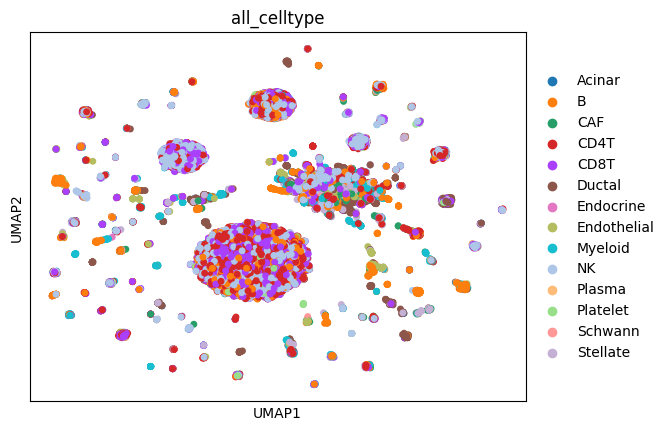

In [10]:
clusters_of_interest = ["CAF", "Stellate", "Schwann"]

# Нормализация данных
print("Нормализация данных...")
sc.pp.normalize_total(adata_genes, target_sum=1e4)
sc.pp.log1p(adata_genes)

# Выбор вариативных генов
print("Выбор вариативных генов...")
sc.pp.highly_variable_genes(adata_genes, n_top_genes=2000)

# PCA
print("Вычисление PCA...")
sc.pp.pca(adata_genes, svd_solver='arpack')

# Построение графа соседства
print("Построение графа соседства...")
sc.pp.neighbors(adata_genes, n_neighbors=15, n_pcs=40)

# UMAP
print("Построение UMAP...")
sc.tl.umap(adata_genes)

print(f"\nUMAP вычислен! Размерность adata_genes: {adata_genes.shape}")
print(f"Значения в obsm: {list(adata_genes.obsm.keys())}")

# Визуализация на всей популяции
print("\nПостроение графиков UMAP...")
sc.pl.umap(adata_genes, color=['all_celltype'], size=100)

### Корреляция типов клеток по выбранным генам 

Оценивается корреляция Пирсона

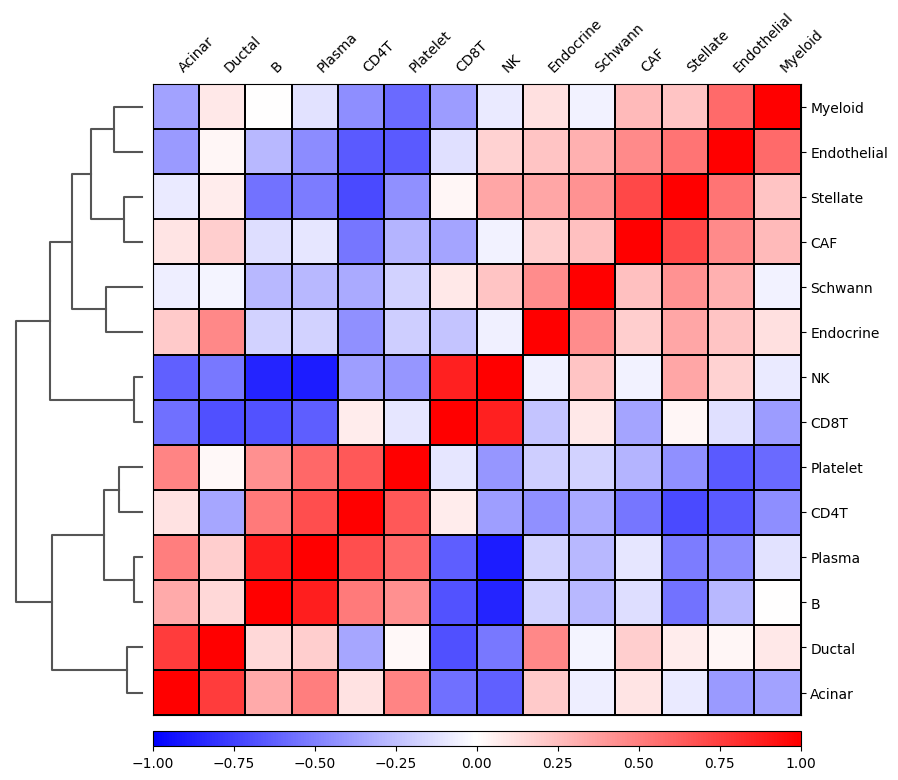

In [12]:
sc.tl.dendrogram(adata_genes, 'all_celltype', n_pcs=30)
ax = sc.pl.correlation_matrix(adata_genes, 'all_celltype')

**Вывод:**

Именно по этим генам, указанным во второй задаче CAF, Schwann и Stellate достаточно сильно коррелируют. Интересно, что Endocrine тоже встаёт в данный ряд


Можно ещё построить дендрограмму

In [15]:
sc.tl.dendrogram(adata_genes, 'all_celltype', use_raw=True)

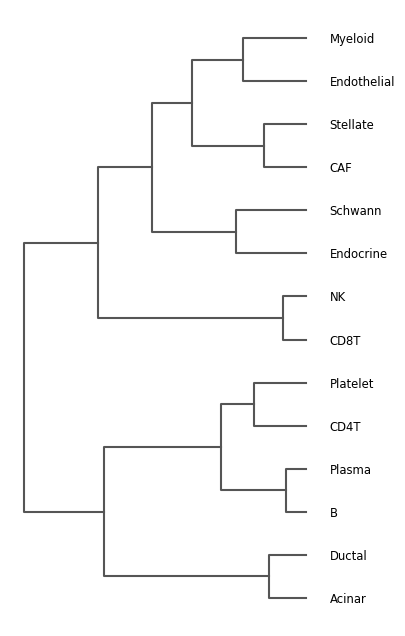

In [18]:
rcParams['figure.figsize'] = 4,8
ax = sc.pl.dendrogram(adata_genes, 'all_celltype', orientation='left')

Сложно сделать вывод, но достаточно интересно 

Поработаю только с тремя данными типами клеток

# Три типа клеток: CAF, Stellate, Schwann

In [13]:
adata_subset = adata[adata.obs['all_celltype'].isin(['CAF', 'Schwann', 'Stellate'])]

### UMAP

Выполняю всё то же, что и на прошлом этапе

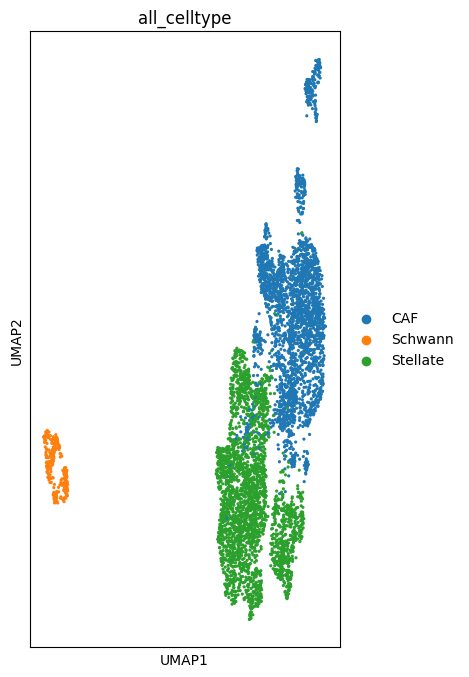

In [20]:
sc.pp.normalize_total(adata_subset, target_sum=1e4)
sc.pp.log1p(adata_subset)

sc.pp.highly_variable_genes(adata_subset, n_top_genes=2000)

sc.pp.pca(adata_subset, svd_solver='arpack')

sc.pp.neighbors(adata_subset, n_neighbors=15, n_pcs=40)

sc.tl.umap(adata_subset)

sc.pl.umap(adata_subset, color=['all_celltype'])

### tSNE

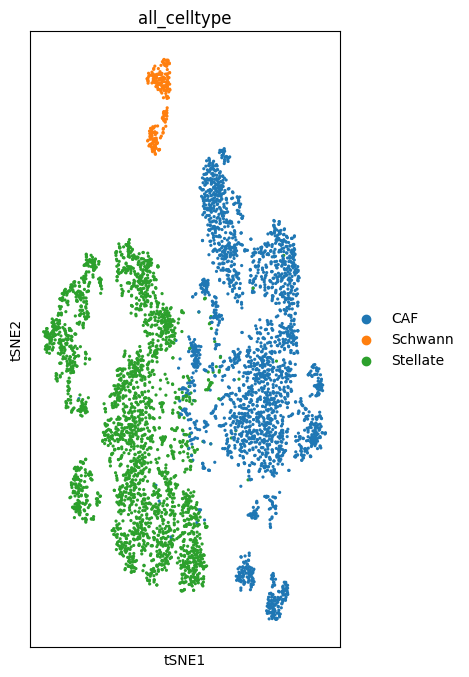

In [21]:
sc.tl.tsne(adata_subset, use_rep="X_pca")

sc.pl.tsne(adata_subset, color="all_celltype")

Интересно, что внутри всех кластеров присутствуют ещё маленькие субкластеры

### Визуализируем распределение наших генов 

Делаю на UMAP, так как на нём чётче разделение наших кластеров

**Как анализировать данные графики?**

Опираясь на картинку выше мы можем приблизительно понять какие точки отвечают за какую группу клеток. Держа в голове эти границы, мы можем оценить в каких клетках выше экспрессия тех или иных генов. 

Например, SYN2 экспрессируется во всех клетках примерно одинаково, а вот NRNX1 явно только в шванновских клетках

SYN1:


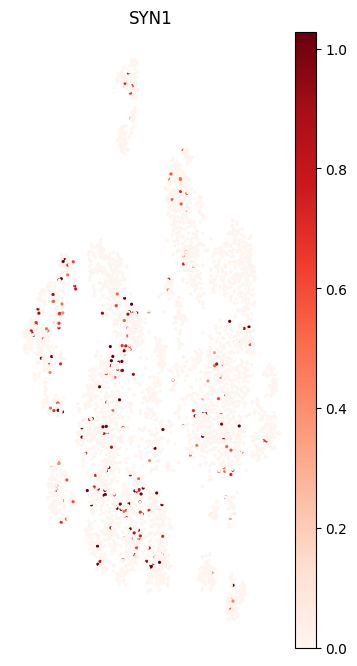





SYN2:


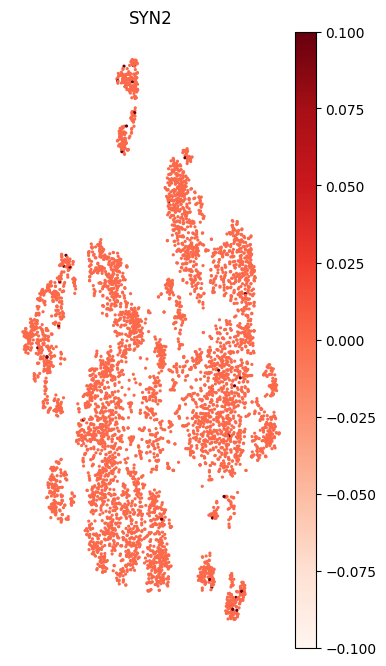





SYN3:


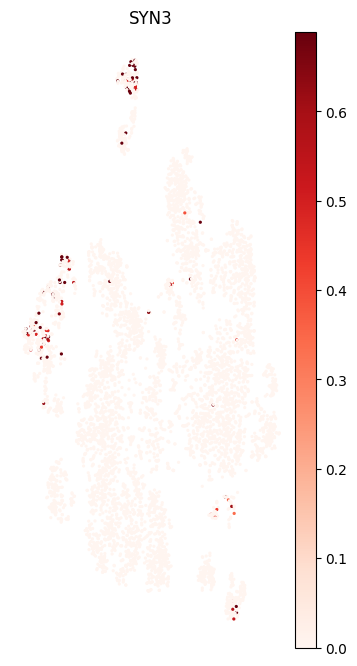





SYP:


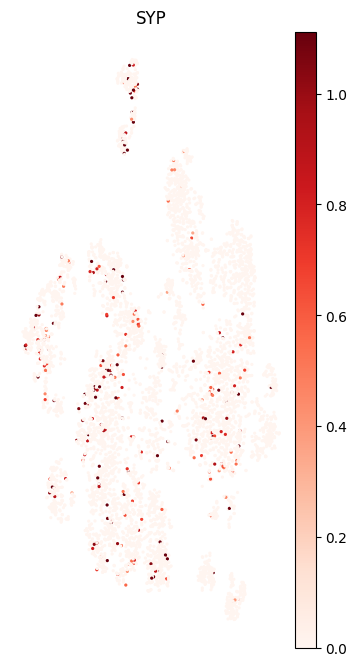





SYT1:


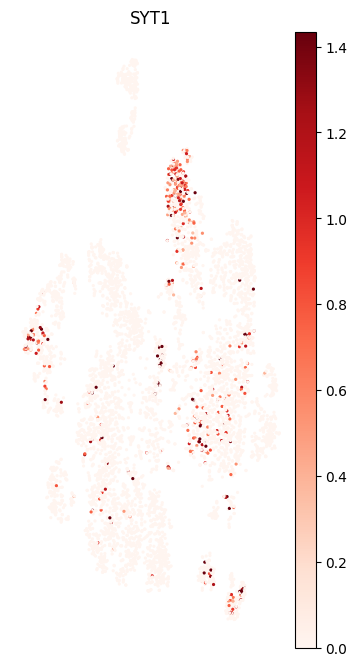





SYT2:


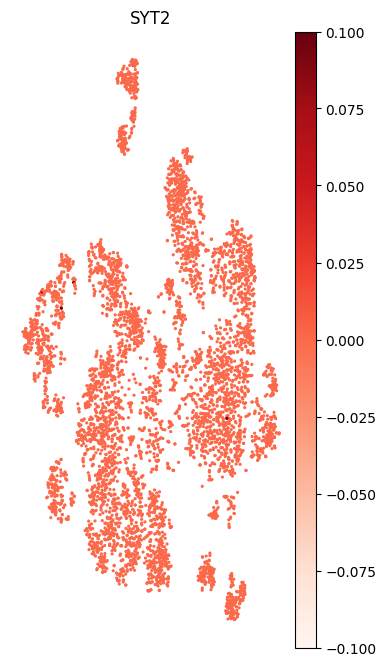





SYT3:


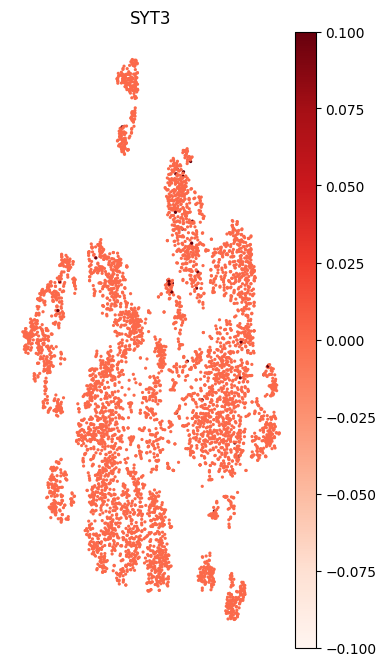





SYT4:


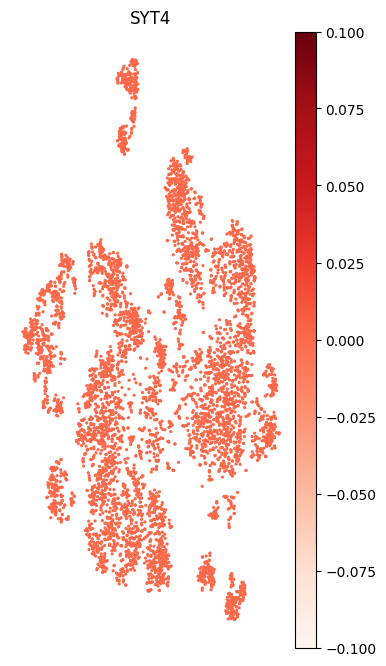





SYT9:


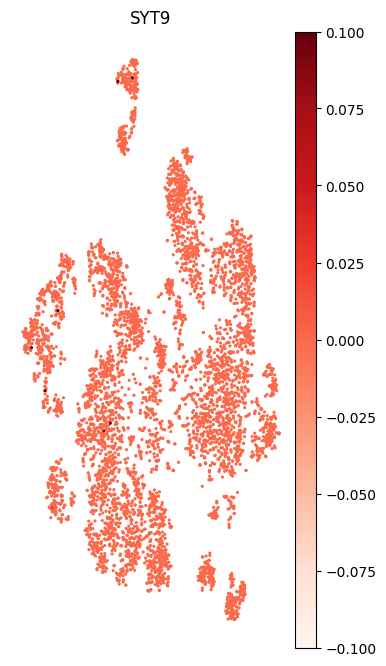





SYT10:


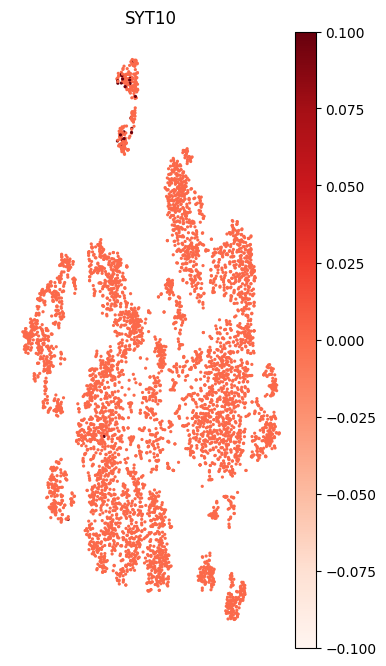





SYT11:


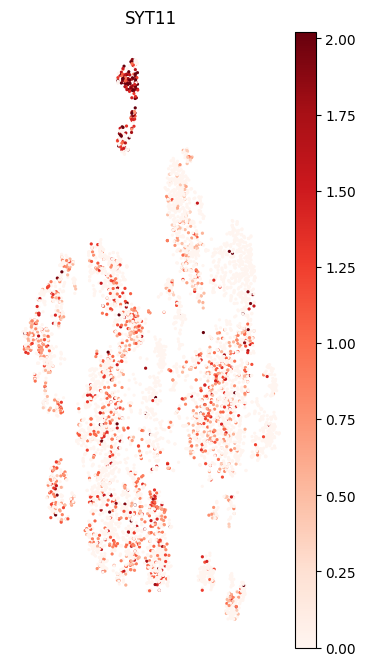





SYT12:


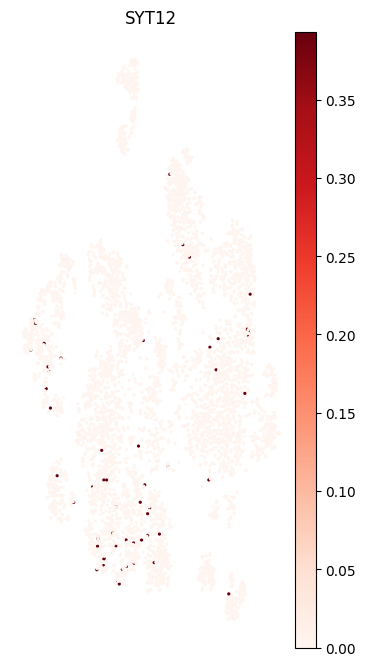





SYT13:


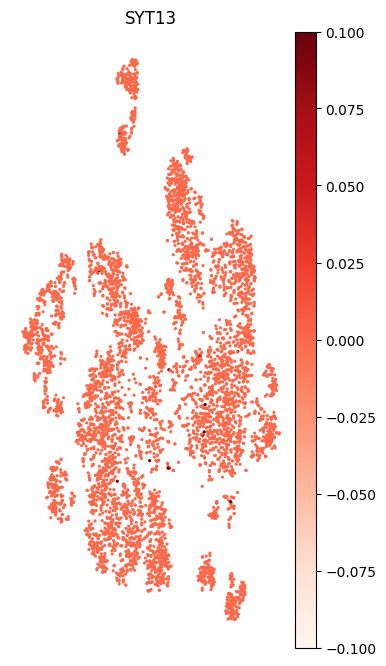





SYT17:


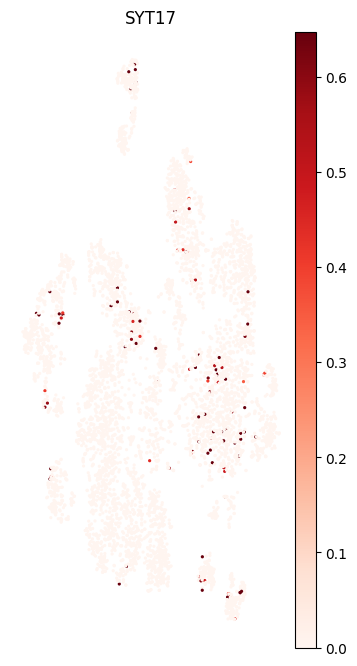





PTPRS:


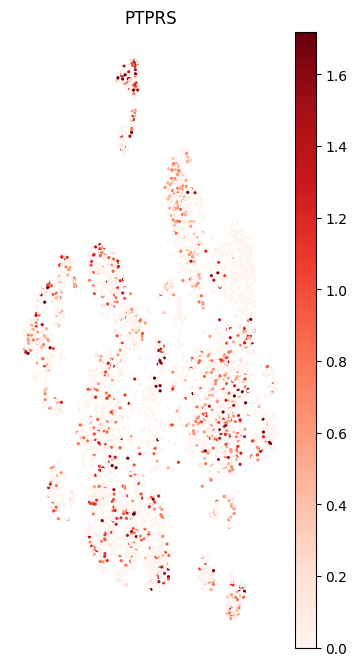





PTPRD:


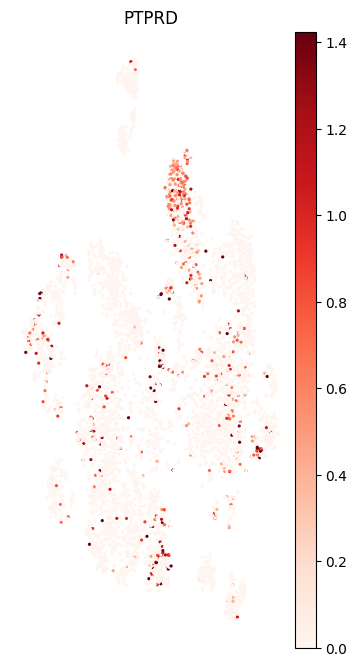





PTPRF:


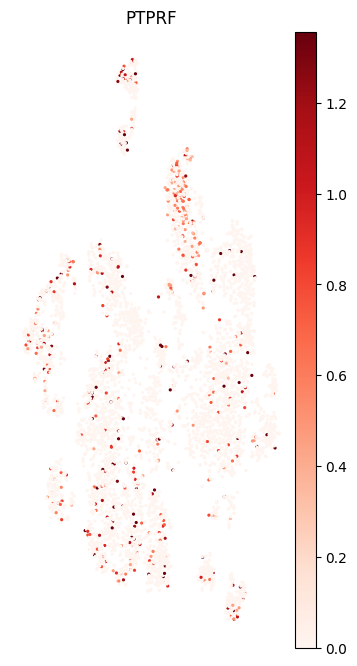





NRXN1:


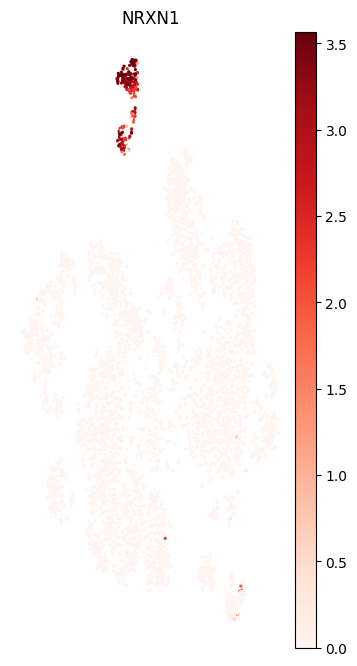





NRXN2:


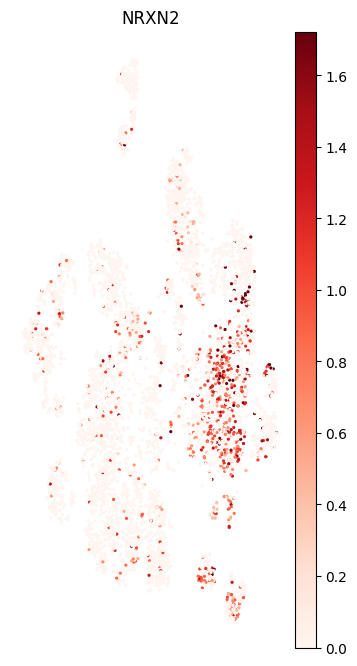





NRXN3:


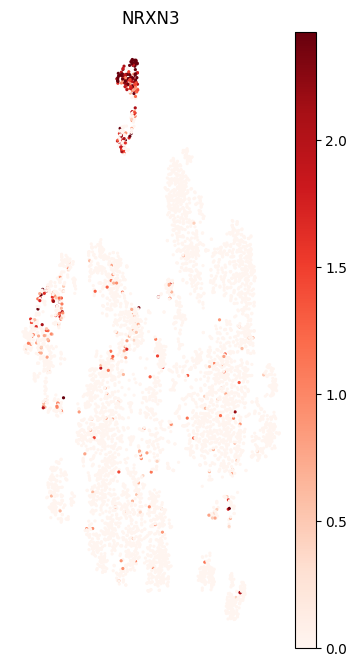





PPFIA1:


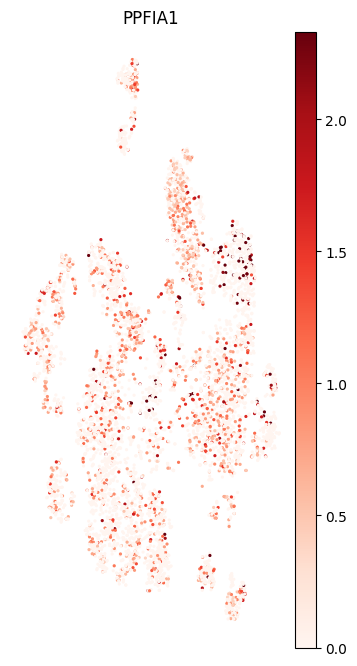





NLGN1:


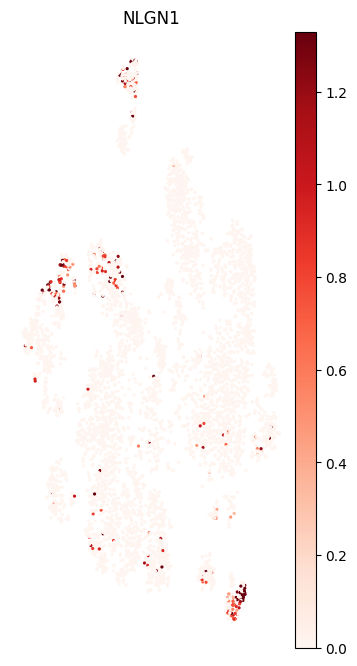





NLGN2:


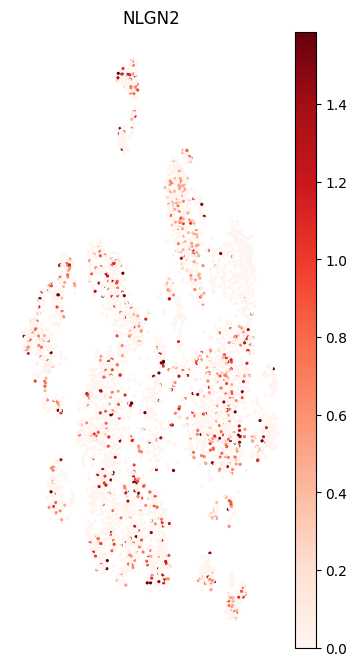





NLGN3:


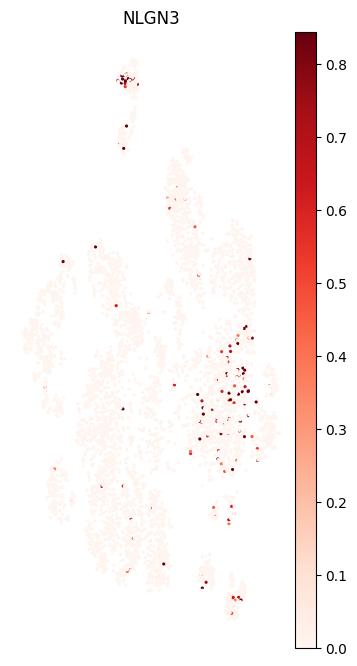





NLGN4X:


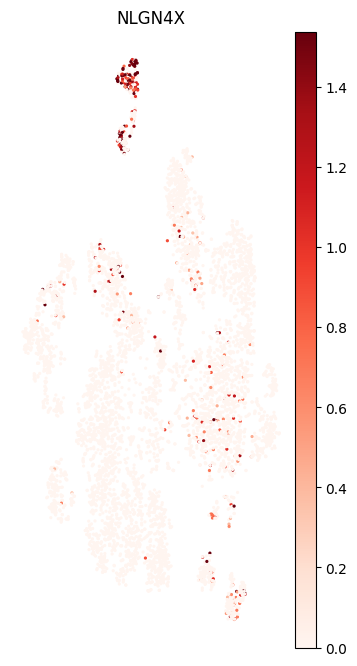





NLGN4Y:


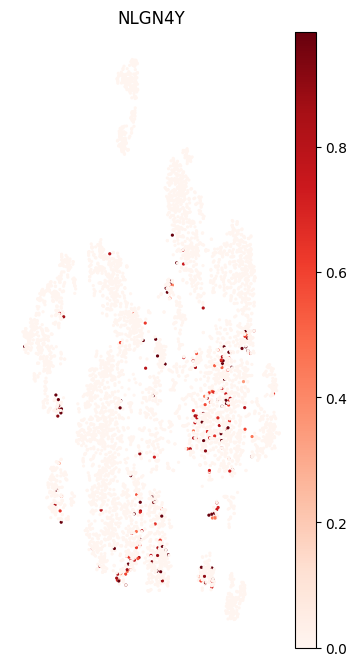





GRIK2:


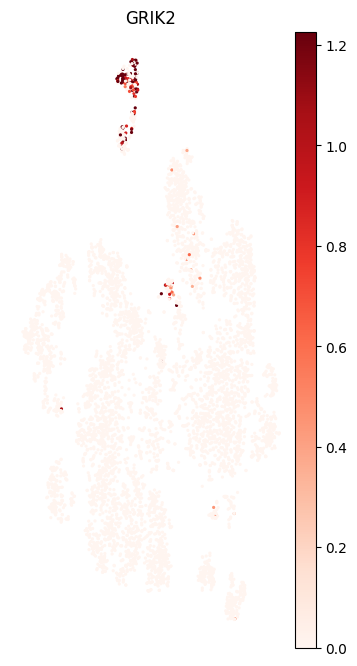





GRIK4:


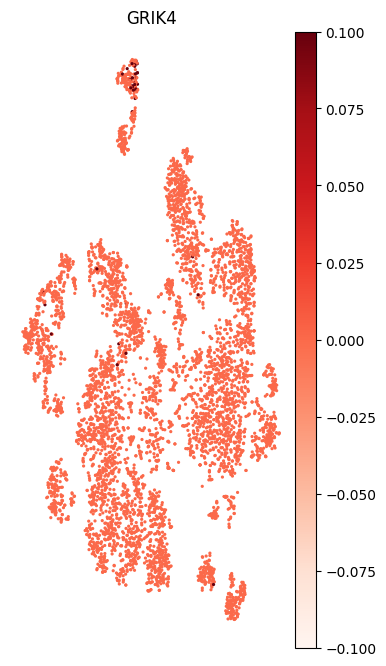





GRIA1:


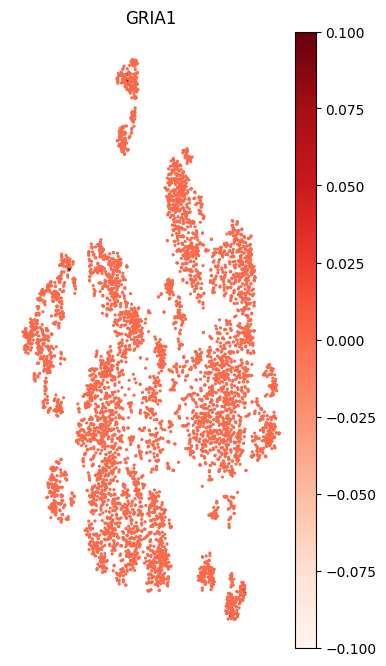





GRIA2:


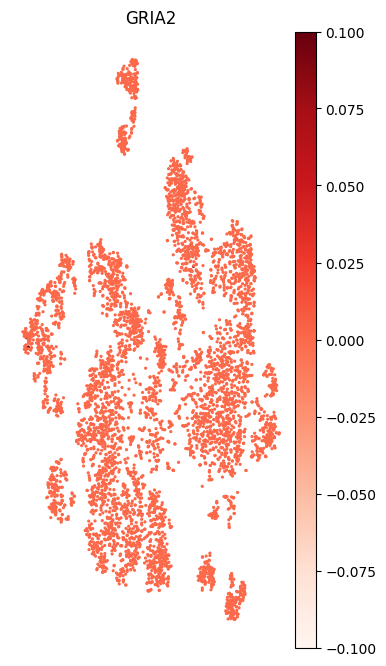





GRIA3:


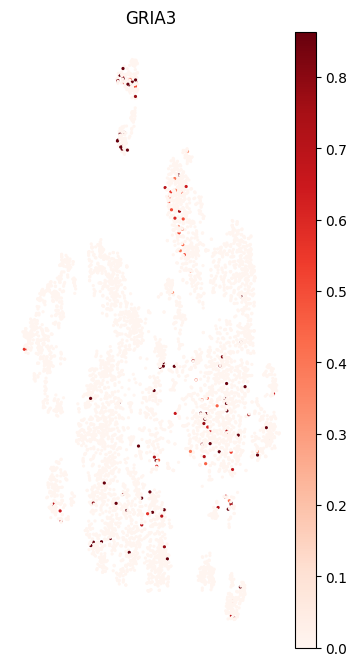





GRIA4:


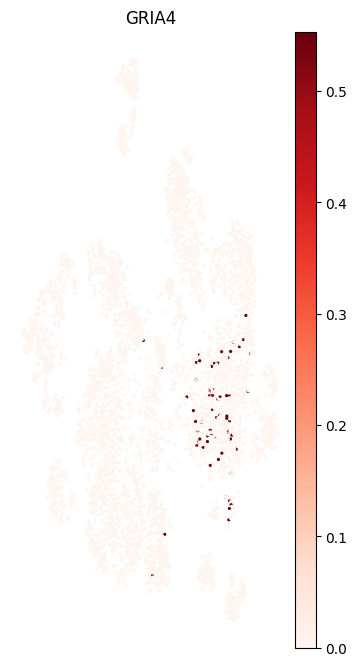





GRIN1:


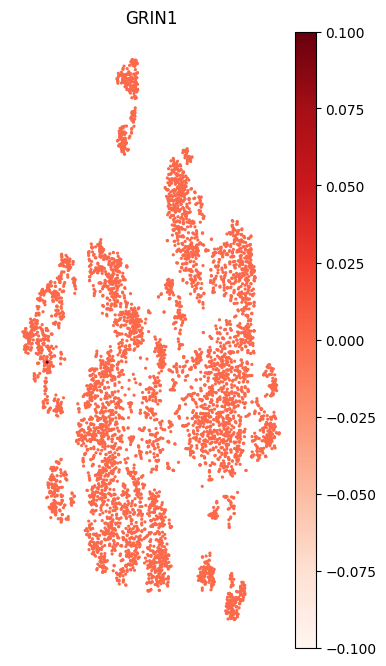





GRIN2A:


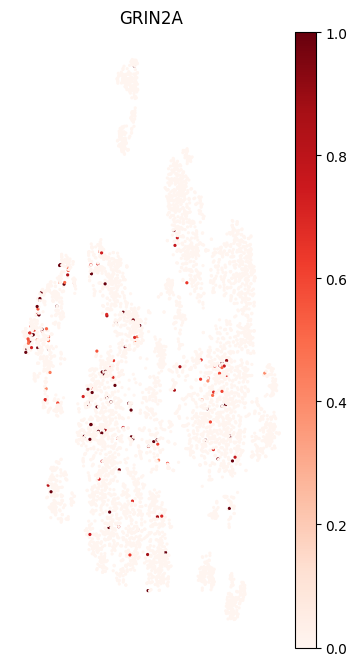





GRIN2B:


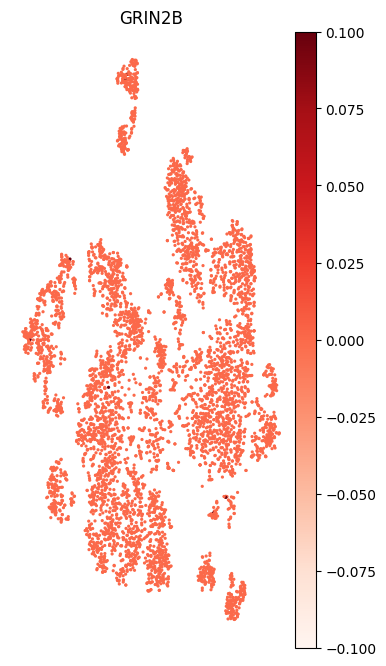





GRIN2C:


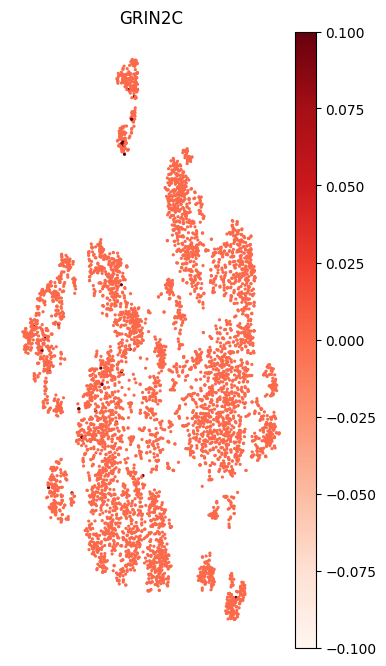





GRIN2D:


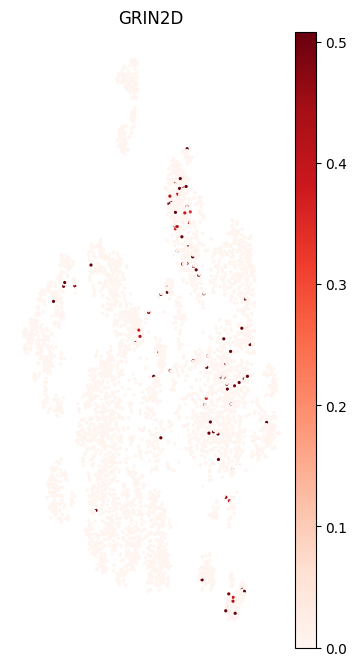





SLC17A7:


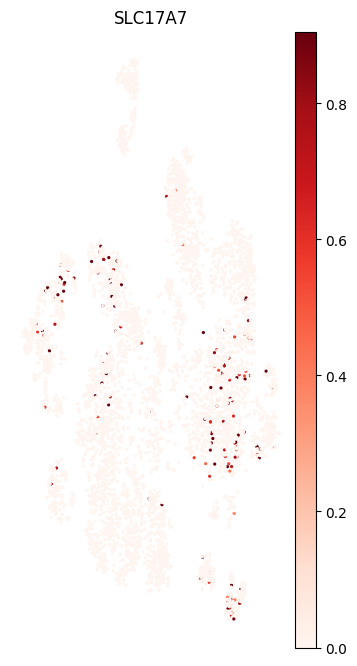





SLC17A6:


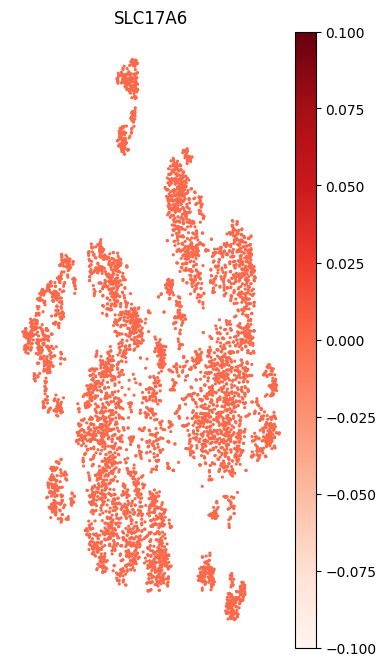





SLC6A3:


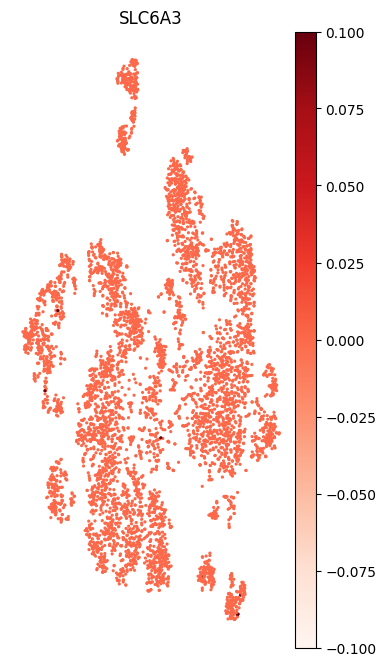





DRD1:


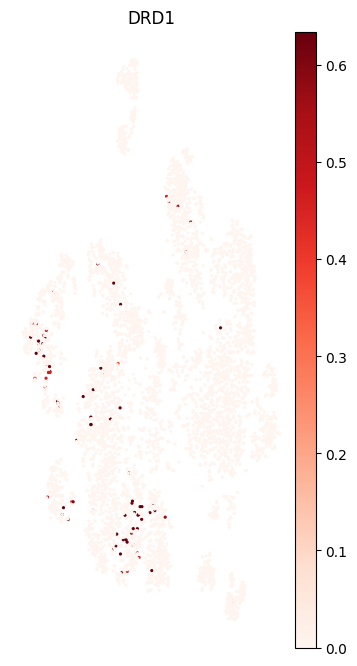





DRD2:


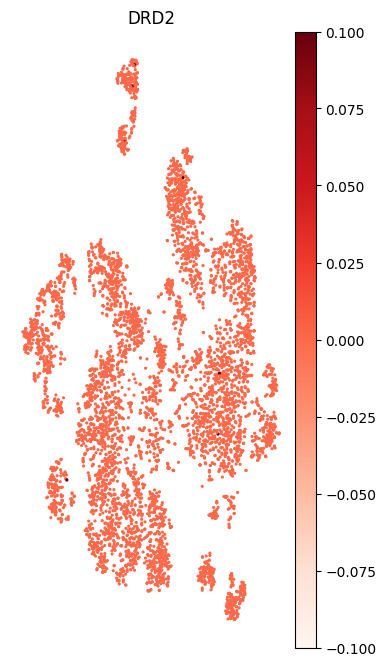





DRD4:


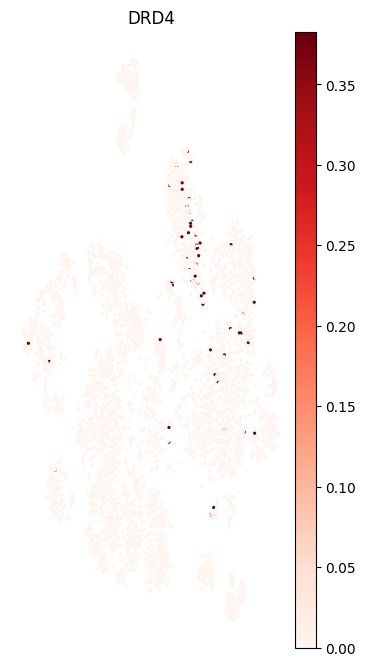





DRD5:


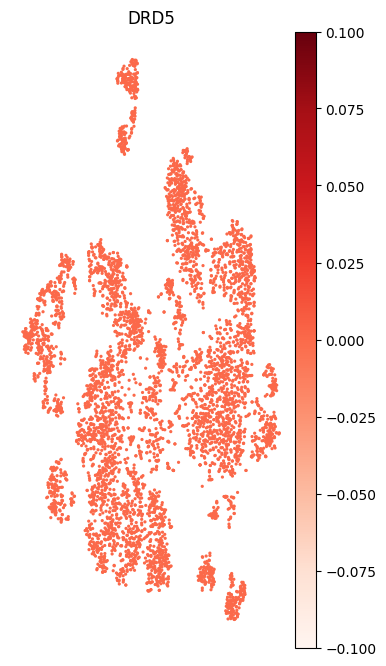





SLC32A1:


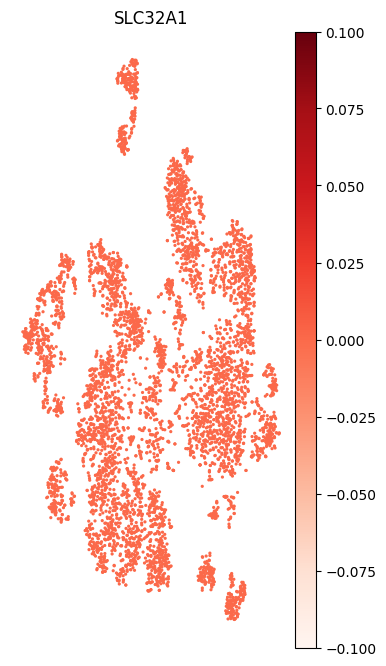





GABRA1:


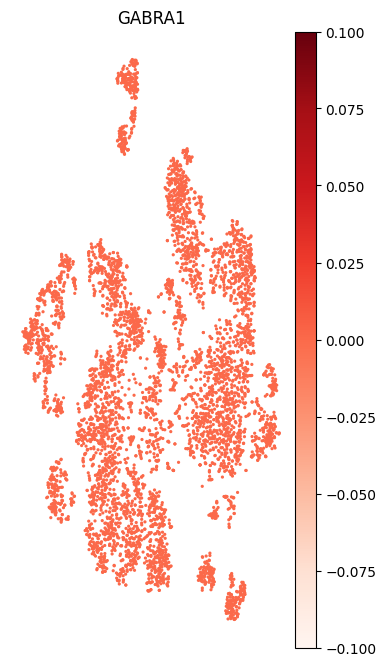





GABRA2:


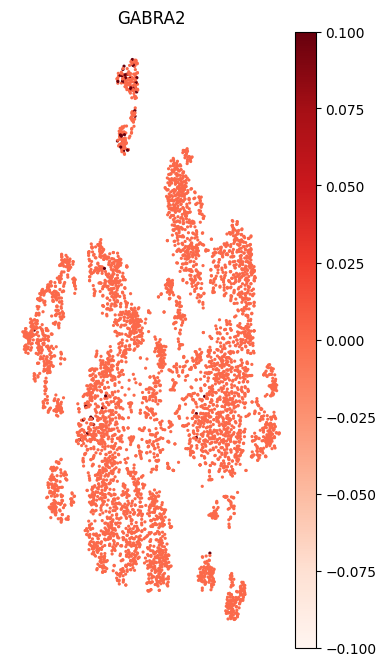





GABRA3:


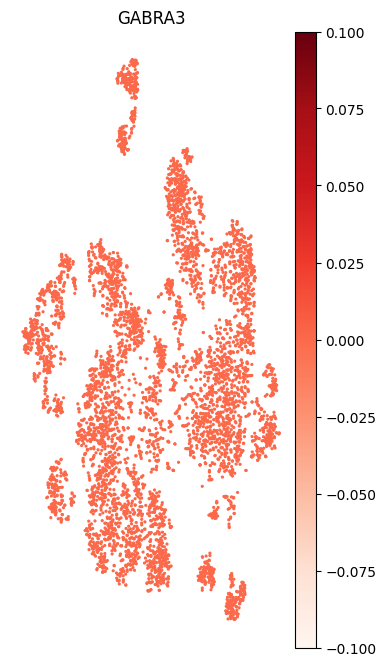





GABRA4:


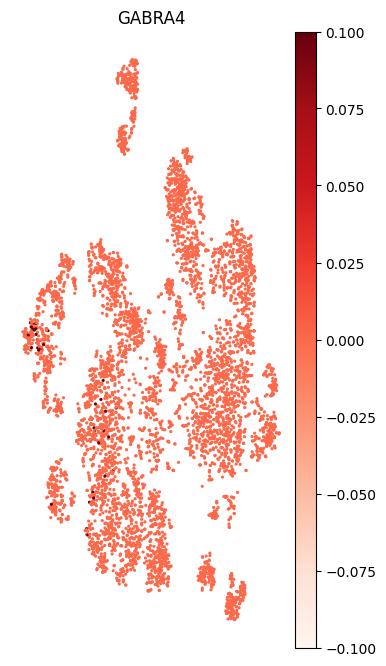





SLC6A4:


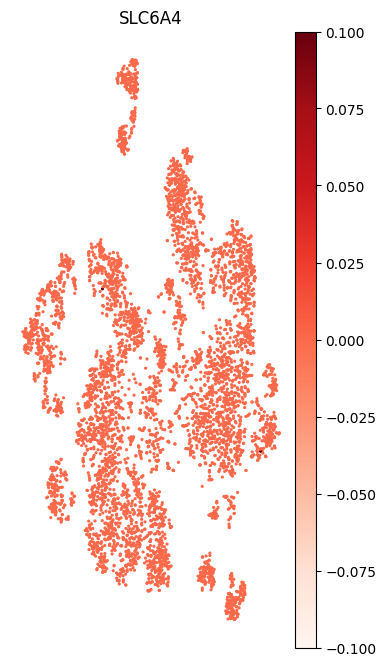





HTR1A:


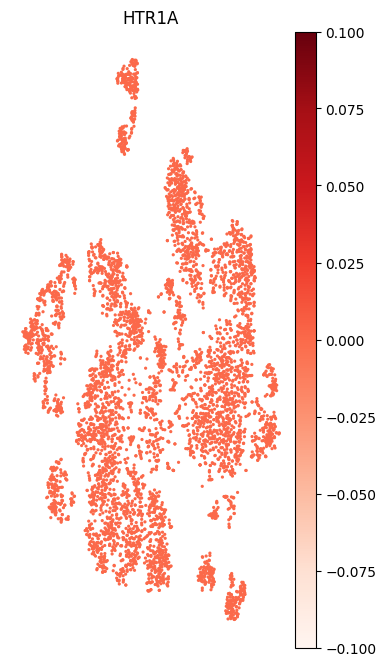





HTR2A:


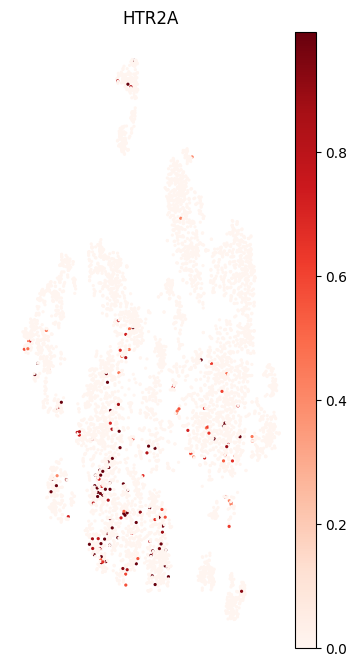





HTR4:


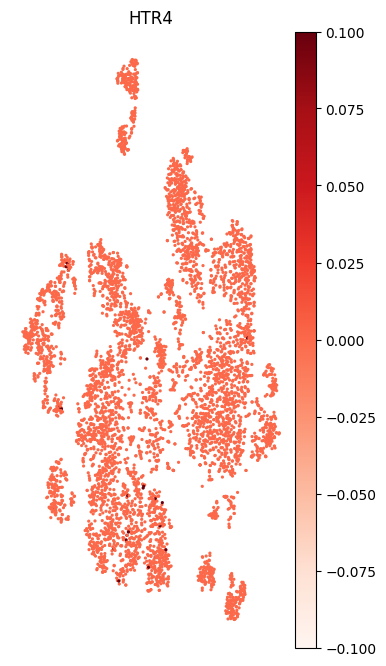





HTR7:


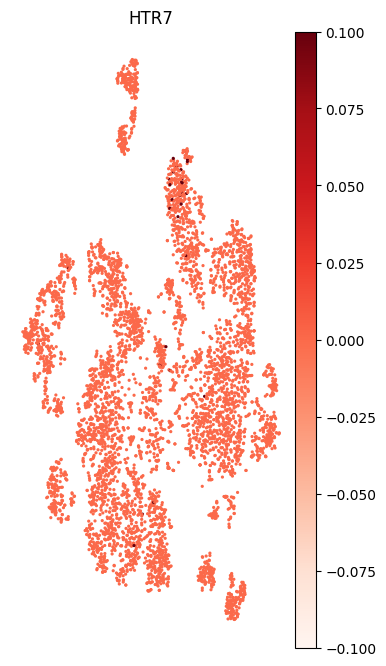





SLC6A2:


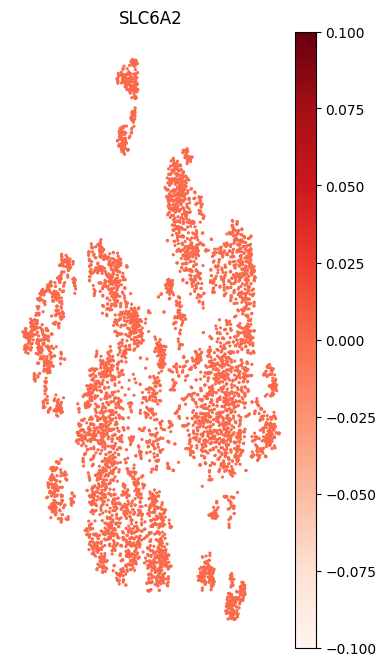





NTNG1:


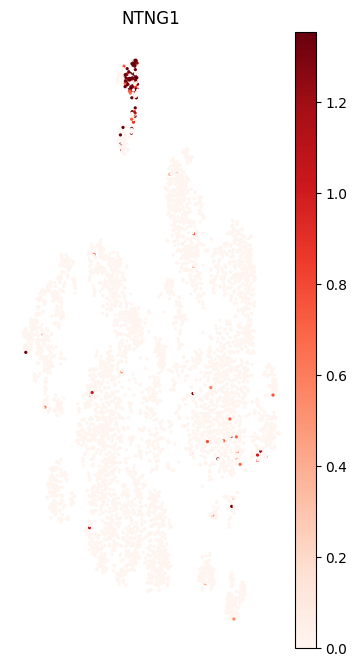





NTNG2:


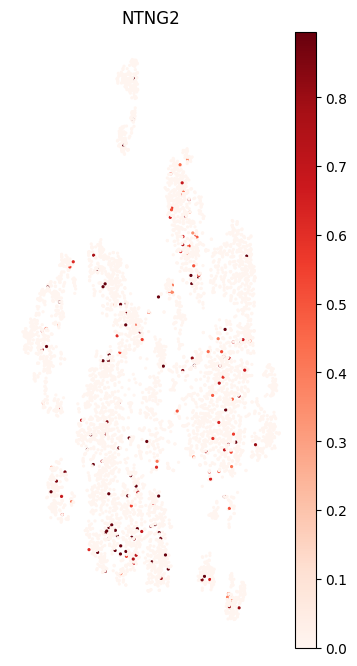





LRRC4C:


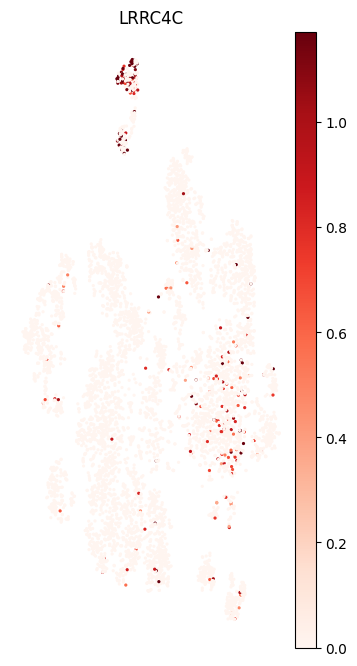





LRRC4:


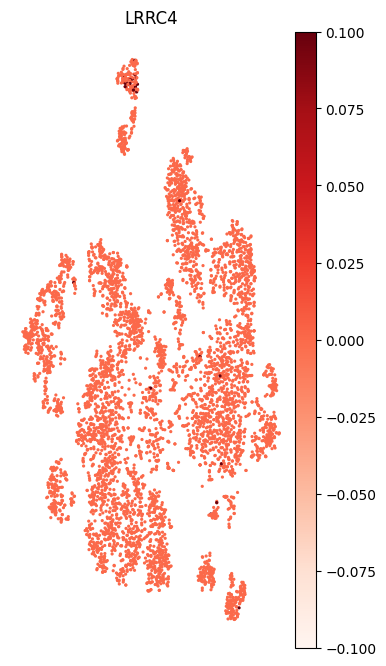





LRRC4B:


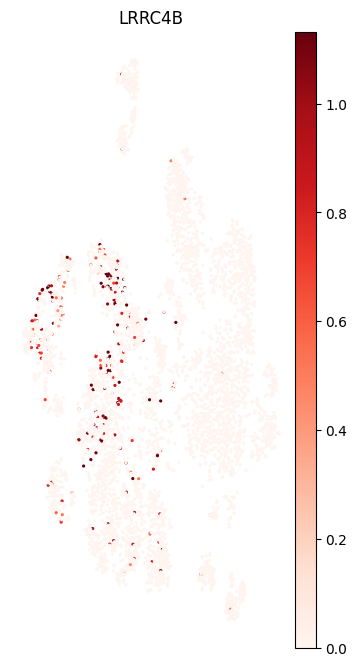

In [24]:
for gene in genes_present:
    print(f"{gene}:")
    sc.pl.tsne(
        adata_subset,
        color=gene,
        vmin=0,
        vmax="p99",
        sort_order=False,
        frameon=False,
        cmap="Reds"
    )
    print("\n\n\n")

Ну и построим violin плоты с этими данными 

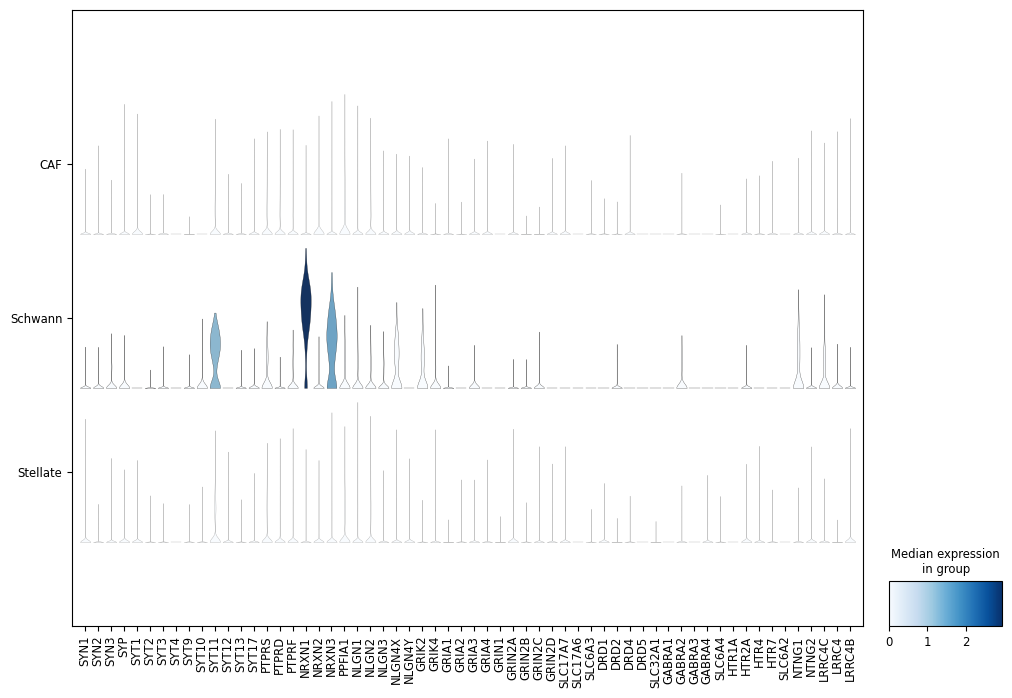

In [29]:
selected_groups = ['Schwann', 'CAF', 'Stellate']
adata_group = adata_subset[adata_subset.obs['all_celltype'].isin(selected_groups)]
ax = sc.pl.stacked_violin(
    adata_group,
    genes_present,
    groupby='all_celltype',
    figsize=(12, 8)
)

**Вывод**

SYT11, NRXN1 и NRXN3 отличают шванновские клетки от других двух групп